# Practical Assignment: Binary Classification using Logistic Regression, Neural Networks, and Random Forest

### Problem Statement
In this assignment, you'll predict the presence of heart disease in patients using clinical data. This practical exercise involves real-world binary classification, employing techniques you've learned:
- Logistic Regression
- Neural Networks
- Random Forest

### Dataset Description
The dataset used is the [Heart Disease UCI dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease), which contains medical attributes such as age, cholesterol levels, blood pressure, and more.

The task is to predict whether a patient has heart disease (target = 1) or not (target = 0).

### Objectives
- Perform exploratory data analysis (EDA)
- Preprocess data effectively
- Train and evaluate models: Logistic Regression, Neural Networks, Random Forest
- Compare the performance of models using appropriate metrics


In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


## Load the dataset

In [275]:
# Load the dataset
df = pd.read_csv('heart.csv')
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Exploratory Data Analysis

In [276]:
# Check data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [277]:
# Check for missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

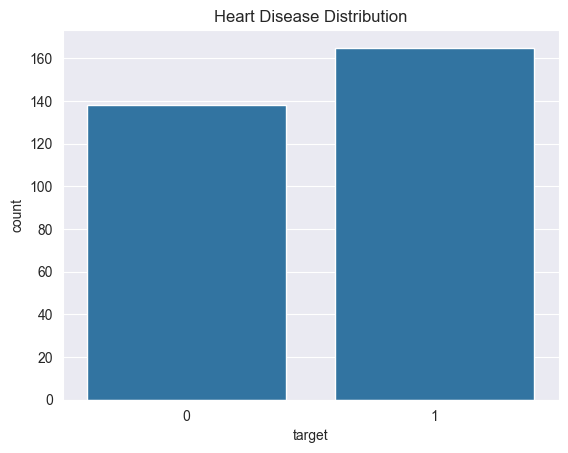

In [278]:
# Visualize class distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()


### Perform various visualization to understand the nature of data

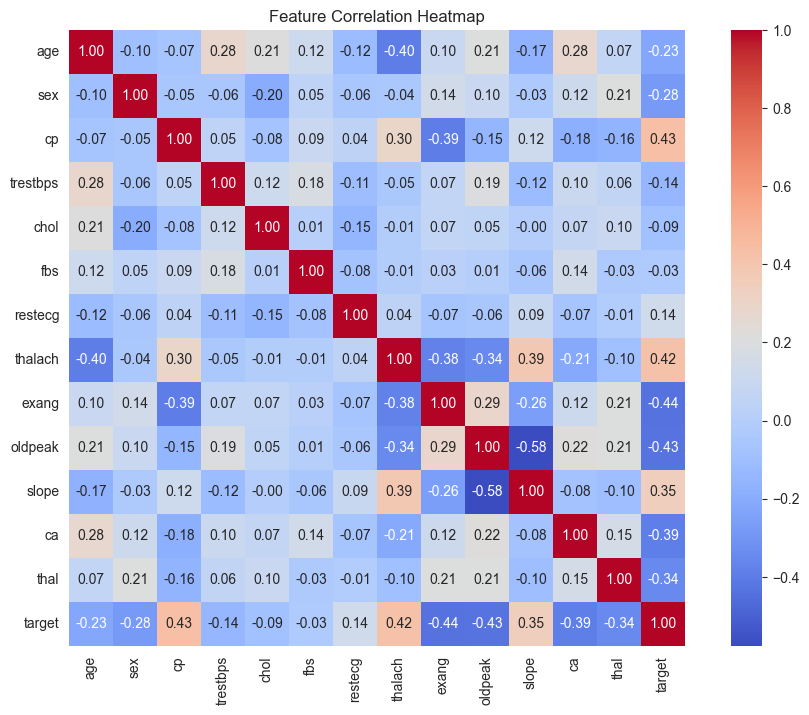

In [279]:
# Python
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

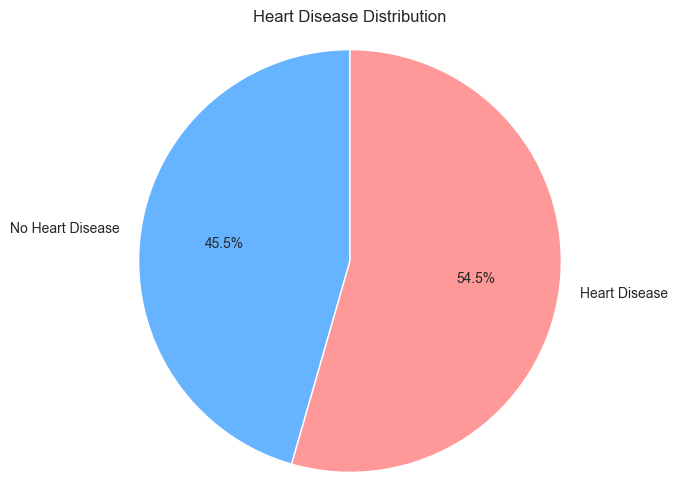

In [280]:
labels = ['No Heart Disease', 'Heart Disease']
sizes = df['target'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Heart Disease Distribution')
plt.axis('equal')
plt.show()

## Data Preprocessing

- Divide the data into Features and Target
- Perform Feature Scaling
- Divide the data into Training and Test Sets

In [281]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [282]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Outlier detection using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

# Separate features and target
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# Remove outliers
X_no_outliers = remove_outliers_iqr(X)
Y_no_outliers = Y.loc[X_no_outliers.index]

In [283]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_outliers)

In [284]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, Y_res = smote.fit_resample(X_scaled, Y_no_outliers)

/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [285]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_res, Y_res, test_size=0.2, random_state=42, stratify=Y_res
)


## Logistic Regression Model

- Initialize a Logistic Regression Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Add more cells as required.

In [286]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print(model.intercept_)
print(model.coef_)

[0.12839909]
[[ 0.13697235 -0.87634832  0.86077479 -0.15952511 -0.27572518  0.
   0.04258423  0.33322903 -0.26688411 -0.50258384  0.66370327 -1.13273128
  -0.84638562]]


In [287]:
score = model.score(X_test, Y_test)
score

0.8679245283018868

In [288]:
score = model.score(X_train, Y_train)
score

0.8720379146919431

In [289]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Y_pred_train = model.predict(X_train)

accuracy = accuracy_score(Y_train, Y_pred_train)
recall = recall_score(Y_train, Y_pred_train)
precision = precision_score(Y_train, Y_pred_train)
f1 = f1_score(Y_train, Y_pred_train)

print("Training Performance.....")
print(f"Accuracy: {accuracy:0.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1-score: {f1:.3f}")
print("....................")


Training Performance.....
Accuracy: 0.872
Recall: 0.896
Precision: 0.856
F1-score: 0.876
....................


In [290]:
Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Test Performance.....")
print(f"Accuracy: {accuracy:0.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1-score: {f1:.3f}")
print("....................")

Test Performance.....
Accuracy: 0.868
Recall: 0.846
Precision: 0.880
F1-score: 0.863
....................


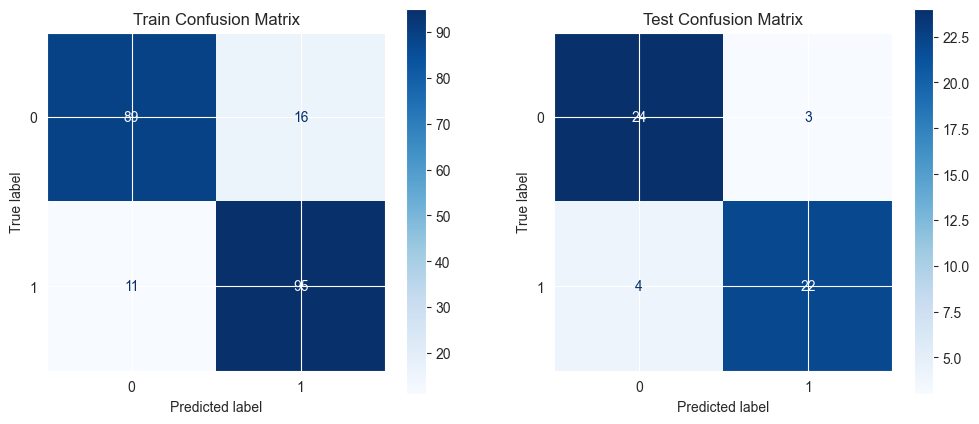

In [291]:
from sklearn.metrics import ConfusionMatrixDisplay
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(Y_train, Y_pred_train, ax=axes[0], cmap='Blues')
axes[0].set_title('Train Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_test, ax=axes[1], cmap='Blues')
axes[1].set_title('Test Confusion Matrix')
plt.show()

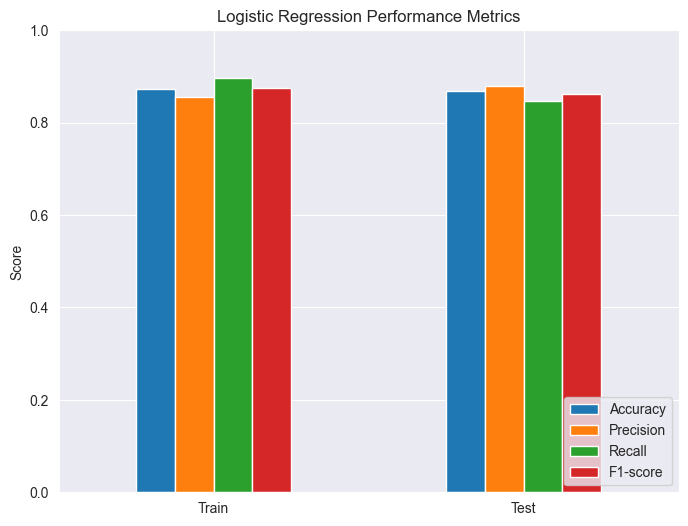

In [292]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predictions
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Metrics
metrics = {
    'Accuracy': [accuracy_score(Y_train, Y_pred_train), accuracy_score(Y_test, Y_pred_test)],
    'Precision': [precision_score(Y_train, Y_pred_train), precision_score(Y_test, Y_pred_test)],
    'Recall': [recall_score(Y_train, Y_pred_train), recall_score(Y_test, Y_pred_test)],
    'F1-score': [f1_score(Y_train, Y_pred_train), f1_score(Y_test, Y_pred_test)]
}

df_metrics = pd.DataFrame(metrics, index=['Train', 'Test'])

# Plot
df_metrics.plot(kind='bar', figsize=(8, 6))
plt.title('Logistic Regression Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

## Neural Network Model

- Design a Neural Network Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Plot the train and test accuracy after each epoch (Hint: Use History)
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Add more cells as required.

In [293]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(X_train.shape[1],))
model_nn = Sequential([
    inputs,
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_nn.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4586 - loss: 0.8264 - val_accuracy: 0.4340 - val_loss: 0.7332
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5311 - loss: 0.6970 - val_accuracy: 0.4717 - val_loss: 0.6863
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5737 - loss: 0.7058 - val_accuracy: 0.5849 - val_loss: 0.6481
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5607 - loss: 0.6849 - val_accuracy: 0.6604 - val_loss: 0.6195
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6159 - loss: 0.6051 - val_accuracy: 0.7170 - val_loss: 0.5938
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 0.6040 - val_accuracy: 0.7547 - val_loss: 0.5708
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6187 - loss: 0.6119 - val_accuracy: 0.7736 - val_loss: 0.5495
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7379 - loss: 0.5381 - val_accuracy: 0.7925 - val_loss:

In [294]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities
Y_pred_train_prob = model_nn.predict(X_train)
Y_pred_test_prob = model_nn.predict(X_test)

# Convert probabilities to class labels
Y_pred_train = (Y_pred_train_prob > 0.5).astype(int).flatten()
Y_pred_test = (Y_pred_test_prob > 0.5).astype(int).flatten()

# Training metrics
train_accuracy = accuracy_score(Y_train, Y_pred_train)
train_precision = precision_score(Y_train, Y_pred_train)
train_recall = recall_score(Y_train, Y_pred_train)
train_f1 = f1_score(Y_train, Y_pred_train)

print("Neural Network Training Performance:")
print(f"Accuracy: {train_accuracy:.3f}")
print(f"Precision: {train_precision:.3f}")
print(f"Recall: {train_recall:.3f}")
print(f"F1-score: {train_f1:.3f}")

# Test metrics
test_accuracy = accuracy_score(Y_test, Y_pred_test)
test_precision = precision_score(Y_test, Y_pred_test)
test_recall = recall_score(Y_test, Y_pred_test)
test_f1 = f1_score(Y_test, Y_pred_test)

print("\nNeural Network Test Performance:")
print(f"Accuracy: {test_accuracy:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"Recall: {test_recall:.3f}")
print(f"F1-score: {test_f1:.3f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Neural Network Training Performance:
Accuracy: 0.891
Precision: 0.881
Recall: 0.906
F1-score: 0.893

Neural Network Test Performance:
Accuracy: 0.887
Precision: 0.917
Recall: 0.846
F1-score: 0.880


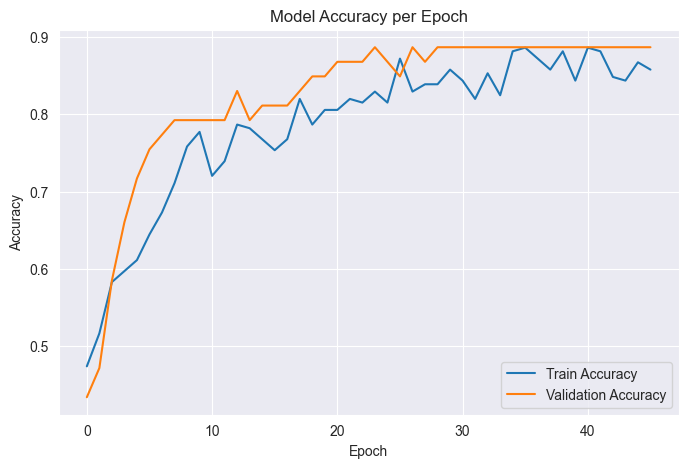

In [295]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

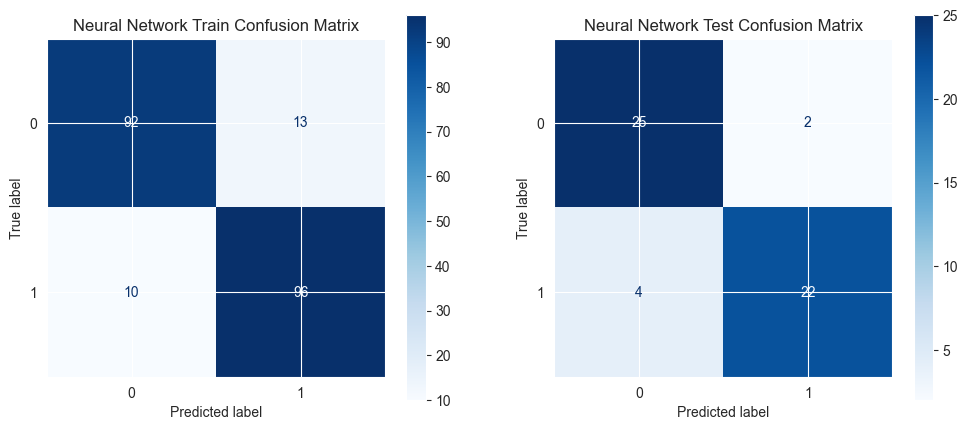

In [296]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(Y_train, Y_pred_train, ax=axes[0], cmap='Blues')
axes[0].set_title('Neural Network Train Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_test, ax=axes[1], cmap='Blues')
axes[1].set_title('Neural Network Test Confusion Matrix')
plt.show()

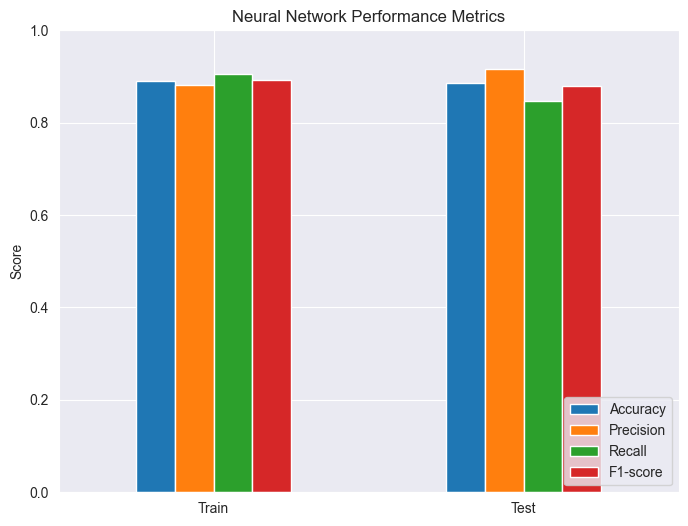

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics for train and test sets
metrics = {
    'Accuracy': [accuracy_score(Y_train, Y_pred_train), accuracy_score(Y_test, Y_pred_test)],
    'Precision': [precision_score(Y_train, Y_pred_train), precision_score(Y_test, Y_pred_test)],
    'Recall': [recall_score(Y_train, Y_pred_train), recall_score(Y_test, Y_pred_test)],
    'F1-score': [f1_score(Y_train, Y_pred_train), f1_score(Y_test, Y_pred_test)]
}

df_metrics = pd.DataFrame(metrics, index=['Train', 'Test'])

# Plot
df_metrics.plot(kind='bar', figsize=(8, 6))
plt.title('Neural Network Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

## Random Forest Model

- Design a Random Forest Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Identify the most important features
- Train the model on top 5 features, does it perform better than the model trained with all the features?
- Add more cells as required.

In [298]:

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,            # Limit tree depth
    min_samples_leaf=10,
    min_samples_split=10, # Minimum samples per leaf
    random_state=42
)
rf_model.fit(X_train, Y_train)
# Predictions
Y_pred_train_rf = rf_model.predict(X_train)
Y_pred_test_rf = rf_model.predict(X_test)

# Training metrics
print("Random Forest Training Performance:")
print(f"Accuracy: {accuracy_score(Y_train, Y_pred_train_rf):.3f}")
print(f"Precision: {precision_score(Y_train, Y_pred_train_rf):.3f}")
print(f"Recall: {recall_score(Y_train, Y_pred_train_rf):.3f}")
print(f"F1-score: {f1_score(Y_train, Y_pred_train_rf):.3f}")

# Test metrics
print("\nRandom Forest Test Performance:")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_test_rf):.3f}")
print(f"Precision: {precision_score(Y_test, Y_pred_test_rf):.3f}")
print(f"Recall: {recall_score(Y_test, Y_pred_test_rf):.3f}")
print(f"F1-score: {f1_score(Y_test, Y_pred_test_rf):.3f}")

Random Forest Training Performance:
Accuracy: 0.872
Precision: 0.876
Recall: 0.868
F1-score: 0.872

Random Forest Test Performance:
Accuracy: 0.906
Precision: 0.889
Recall: 0.923
F1-score: 0.906


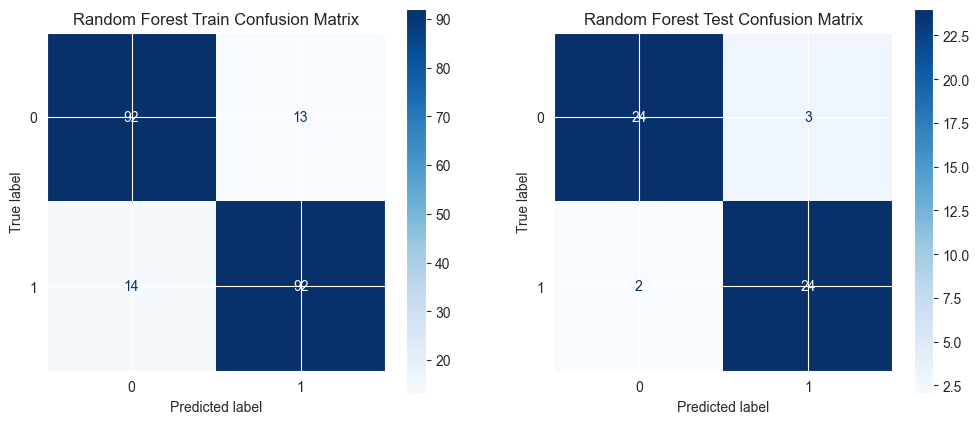

In [299]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(Y_train, Y_pred_train_rf, ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest Train Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_test_rf, ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Test Confusion Matrix')
plt.show()

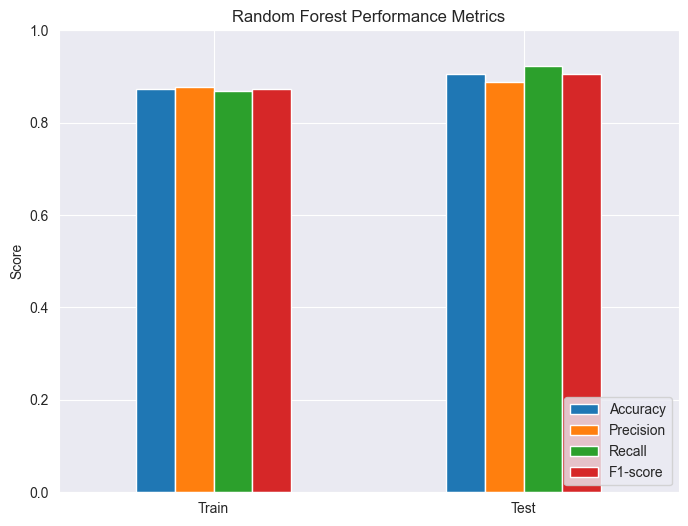

In [300]:
metrics = {
    'Accuracy': [accuracy_score(Y_train, Y_pred_train_rf), accuracy_score(Y_test, Y_pred_test_rf)],
    'Precision': [precision_score(Y_train, Y_pred_train_rf), precision_score(Y_test, Y_pred_test_rf)],
    'Recall': [recall_score(Y_train, Y_pred_train_rf), recall_score(Y_test, Y_pred_test_rf)],
    'F1-score': [f1_score(Y_train, Y_pred_train_rf), f1_score(Y_test, Y_pred_test_rf)]
}

df_metrics = pd.DataFrame(metrics, index=['Train', 'Test'])

# Plot
df_metrics.plot(kind='bar', figsize=(8, 6))
plt.title('Random Forest Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, Y_train)

# Best estimator
best_rf = grid.best_estimator_

# Feature importances
importances = best_rf.feature_importances_
feature_names = df.columns[:-1]
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Top 5 features
print("Top 5 features:")
print(feat_imp.head(5))

Top 5 features:
    Feature  Importance
12     thal    0.217086
11       ca    0.149660
2        cp    0.144187
9   oldpeak    0.122253
7   thalach    0.090296


In [302]:
# Select features and target
selected_features = ['cp', 'ca', 'thal', 'thalach', 'oldpeak']
X_selected = df[selected_features]
Y = df['target']

# Scale features
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_selected_res, Y_selected_res = smote.fit_resample(X_selected_scaled, Y)

# Train/test split
X_train_sel, X_test_sel, Y_train_sel, Y_test_sel = train_test_split(
    X_selected_res, Y_selected_res, test_size=0.2, random_state=42, stratify=Y_selected_res
)

# Fit Random Forest
rf_selected = RandomForestClassifier(
    n_estimators=100, max_depth=3, min_samples_leaf=10, min_samples_split=10, random_state=42
)
rf_selected.fit(X_train_sel, Y_train_sel)

# Predict and evaluate
Y_pred_train_sel = rf_selected.predict(X_train_sel)
Y_pred_test_sel = rf_selected.predict(X_test_sel)

print("Random Forest (Top 5 Features) Training Performance:")
print(f"Accuracy: {accuracy_score(Y_train_sel, Y_pred_train_sel):.3f}")
print(f"Precision: {precision_score(Y_train_sel, Y_pred_train_sel):.3f}")
print(f"Recall: {recall_score(Y_train_sel, Y_pred_train_sel):.3f}")
print(f"F1-score: {f1_score(Y_train_sel, Y_pred_train_sel):.3f}")

print("\nRandom Forest (Top 5 Features) Test Performance:")
print(f"Accuracy: {accuracy_score(Y_test_sel, Y_pred_test_sel):.3f}")
print(f"Precision: {precision_score(Y_test_sel, Y_pred_test_sel):.3f}")
print(f"Recall: {recall_score(Y_test_sel, Y_pred_test_sel):.3f}")


Random Forest (Top 5 Features) Training Performance:
Accuracy: 0.871
Precision: 0.845
Recall: 0.909
F1-score: 0.876

Random Forest (Top 5 Features) Test Performance:
Accuracy: 0.818
Precision: 0.769
Recall: 0.909


/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


 ### Based on the test set metrics, the Random Forest model using all features performed slightly better than the model using only the top 5 features, likely because the additional features provided extra predictive information that improved overall accuracy and F1-score.##Based on the test set metrics, the Random Forest model using all features performed slightly better than the model using only the top 5 features, likely because the additional features provided extra predictive information that improved overall accuracy and F1-score.

## Model Comparison

- Compare the performance on Test set for each model on Accuracy, Precision and Recall
- Use Visualization Techniques
- Draw ROC Curves for each of the three model
- What we learn from ROC Curves?
- Add more cells as required.

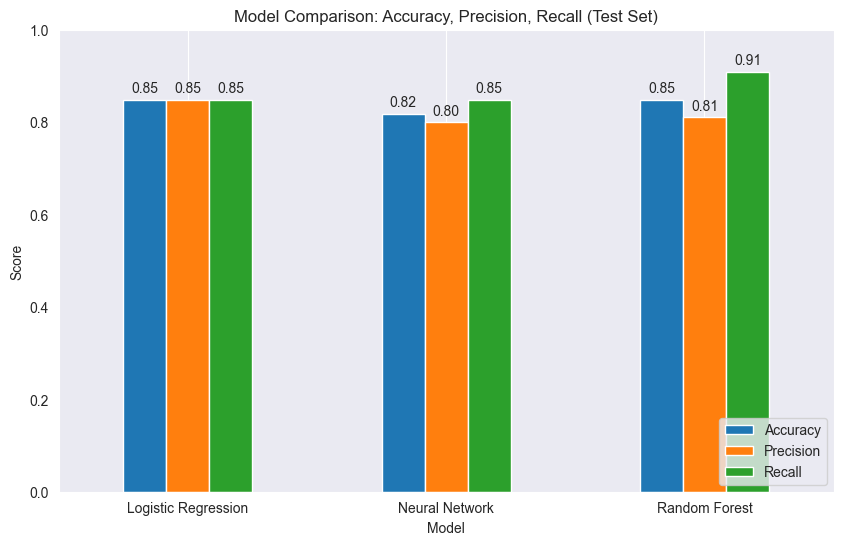

In [303]:
# Fill in your actual test set metrics here
metrics = {
    'Model': ['Logistic Regression', 'Neural Network', 'Random Forest'],
    'Accuracy': [accuracy_score(Y_test, model.predict(X_test)),
                 test_accuracy,  # from NN
                 accuracy_score(Y_test, Y_pred_test_rf)],
    'Precision': [precision_score(Y_test, model.predict(X_test)),
                  test_precision,  # from NN
                  precision_score(Y_test, Y_pred_test_rf)],
    'Recall': [recall_score(Y_test, model.predict(X_test)),
               test_recall,  # from NN
               recall_score(Y_test, Y_pred_test_rf)]
}

ax = df_compare.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Accuracy, Precision, Recall (Test Set)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


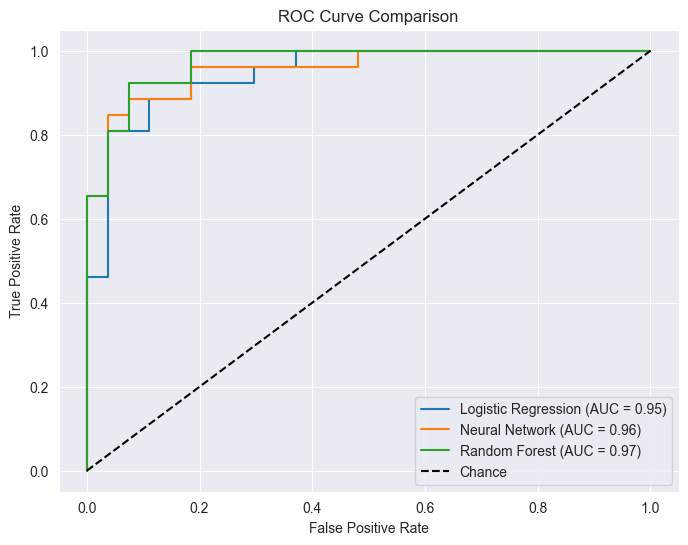

In [304]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression probabilities
y_score_lr = model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Neural Network probabilities
y_score_nn = model_nn.predict(X_test).flatten()
fpr_nn, tpr_nn, _ = roc_curve(Y_test, y_score_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Random Forest probabilities
y_score_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### The ROC curves show how well each model distinguishes between the two classes across all classification thresholds. A model with a curve closer to the top-left corner (higher AUC) performs better at separating positive and negative cases. Comparing the ROC curves and AUC values helps us see which model has the best overall trade-off between sensitivity (recall) and specificity, regardless of the chosen threshold. This is especially useful when class distributions are imbalanced or when the cost of false positives and false negatives differs

## Record the training time for each model and compare them using bar chart.

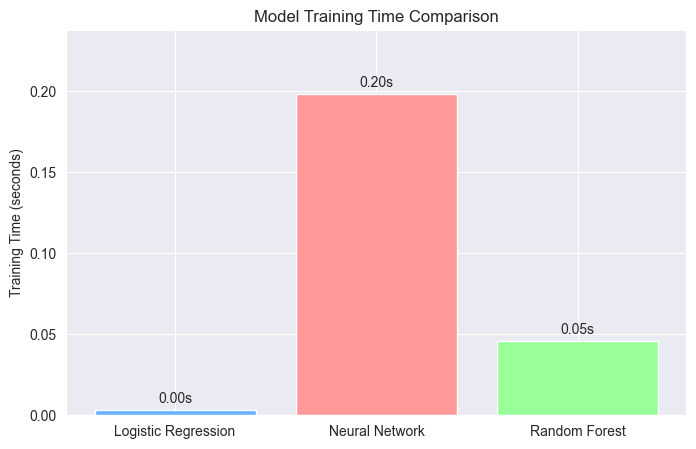

In [305]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Logistic Regression
start = time.time()
model.fit(X_train, Y_train)
lr_time = time.time() - start

# Neural Network
start = time.time()
history = model_nn.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
    verbose=0
)
nn_time = time.time() - start

# Random Forest
start = time.time()
rf_model.fit(X_train, Y_train)
rf_time = time.time() - start

# Bar chart
model_names = ['Logistic Regression', 'Neural Network', 'Random Forest']
times = [lr_time, nn_time, rf_time]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(model_names, times, color=['#66b3ff', '#ff9999', '#99ff99'])
ax.set_ylabel('Training Time (seconds)')
ax.set_title('Model Training Time Comparison')
ax.set_ylim(0, max(times) * 1.2)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}s',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.show()

### K-Fold Cross Validation

In [306]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Store results
results = {
    'Logistic Regression': [],
    'Neural Network': [],
    'Random Forest': []
}

for train_idx, val_idx in skf.split(X_res, Y_res):
    X_tr, X_val = X_res[train_idx], X_res[val_idx]
    Y_tr, Y_val = Y_res.iloc[train_idx], Y_res.iloc[val_idx]

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_tr, Y_tr)
    y_pred = lr.predict(X_val)
    results['Logistic Regression'].append([
        accuracy_score(Y_val, y_pred),
        precision_score(Y_val, y_pred),
        recall_score(Y_val, y_pred),
        f1_score(Y_val, y_pred)
    ])

    # Neural Network
    def build_nn(input_dim):
        model = Sequential([
            Dense(32, activation='relu', input_dim=input_dim),
            Dropout(0.3),
            Dense(16, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        return model

    nn = build_nn(X_tr.shape[1])
    nn.fit(X_tr, Y_tr, epochs=30, batch_size=16, verbose=0)
    y_pred_nn = (nn.predict(X_val) > 0.5).astype(int).flatten()
    results['Neural Network'].append([
        accuracy_score(Y_val, y_pred_nn),
        precision_score(Y_val, y_pred_nn),
        recall_score(Y_val, y_pred_nn),
        f1_score(Y_val, y_pred_nn)
    ])

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10, min_samples_split=10, random_state=42)
    rf.fit(X_tr, Y_tr)
    y_pred_rf = rf.predict(X_val)
    results['Random Forest'].append([
        accuracy_score(Y_val, y_pred_rf),
        precision_score(Y_val, y_pred_rf),
        recall_score(Y_val, y_pred_rf),
        f1_score(Y_val, y_pred_rf)
    ])

# Calculate mean and std for each metric
for model in results:
    scores = np.array(results[model])
    print(f"{model} (mean ± std):")
    print(f"  Accuracy:  {scores[:,0].mean():.3f} ± {scores[:,0].std():.3f}")
    print(f"  Precision: {scores[:,1].mean():.3f} ± {scores[:,1].std():.3f}")
    print(f"  Recall:    {scores[:,2].mean():.3f} ± {scores[:,2].std():.3f}")
    print(f"  F1-score:  {scores[:,3].mean():.3f} ± {scores[:,3].std():.3f}")

/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Logistic Regression (mean ± std):
  Accuracy:  0.848 ± 0.055
  Precision: 0.828 ± 0.044
  Recall:    0.878 ± 0.096
  F1-score:  0.850 ± 0.062
Neural Network (mean ± std):
  Accuracy:  0.840 ± 0.063
  Precision: 0.838 ± 0.047
  Recall:    0.840 ± 0.102
  F1-score:  0.837 ± 0.073
Random Forest (mean ± std):
  Accuracy:  0.837 ± 0.071
  Precision: 0.822 ± 0.050
  Recall:    0.855 ± 0.113
  F1-score:  0.836 ± 0.079


#### Advantages of k-fold cross validation:
Provides a more reliable estimate of model performance by averaging results over multiple splits.
Reduces variance and bias compared to a single train/test split.
Ensures all data points are used for both training and validation, maximizing data utilization.
Helps detect overfitting and underfitting more effectively.
Useful for small datasets where holding out a large test set is not ideal.

**Logistic Regression**
*Strengths:*
- Simple, fast, and easy to interpret.
- Performs well with linearly separable data.
- Less prone to overfitting with regularization.
- Training is very fast (as seen in timing output).

*Weaknesses:*
- Limited to linear relationships.
- May underperform with complex, non-linear data.
- Sensitive to outliers and multicollinearity.

---

**Neural Network**
*Strengths:*
- Can model complex, non-linear relationships.
- Flexible architecture for various data types.
- Often achieves high accuracy with enough data and tuning.

*Weaknesses:*
- Requires more data and computational resources.
- Training is slower (as shown in timing output).
- Harder to interpret ("black box").
- Prone to overfitting if not regularized or tuned properly.

---

**Random Forest**
*Strengths:*
- Handles non-linear data and feature interactions well.
- Robust to outliers and noise.
- Provides feature importance for interpretability.
- Less likely to overfit than single decision trees.

*Weaknesses:*
- Slower to train than logistic regression (but often faster than neural networks).
- Less interpretable than logistic regression.
- May require tuning for best performance.
- Can be memory-intensive with many trees or features.

# is more complex model always the best? yes why, No why ?

No, a more complex model is not always the best.

**Why not?**
- Complex models (like deep neural networks or large ensembles) can overfit, learning noise instead of patterns, especially on small datasets.
- They require more data, computational resources, and tuning.
- They are harder to interpret and debug.
- Simpler models (like logistic regression) often perform as well or better when the relationship is mostly linear or the dataset is small/clean.

**When can complex models be better?**
- When the data has complex, non-linear relationships that simple models cannot capture.
- When there is enough data to avoid overfitting and justify the complexity.

**Summary:**
Choose the simplest model that achieves good performance. Use complex models only when necessary and justified by the data and problem.